In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
pc = pd.read_csv(r"C:\Users\DELL\Documents\DS_LAB_Internal -  Question and Datasets - 2023-May\Computer_data.csv")

In [3]:
pc.head()

,SNO,price,speed,hd,ram,screen,cd
0,1,1499,25,80,4,14,no
1,2,1795,33,85,2,14,no
2,3,1595,25,170,4,15,no
3,4,1849,25,170,8,14,no
4,5,3295,33,340,16,14,no


In [4]:
pc['cd'] = pc['cd'].map({'no':0,'yes':1})

In [5]:
pc['cd'].unique()

array([0, 1], dtype=int64)

In [6]:
pc = pc.drop('SNO',axis= 'columns')

In [7]:
pc

,price,speed,hd,ram,screen,cd
0,1499,25,80,4,14,0
1,1795,33,85,2,14,0
2,1595,25,170,4,15,0
3,1849,25,170,8,14,0
4,3295,33,340,16,14,0
...,...,...,...,...,...,...
6254,1690,100,528,8,15,0
6255,2223,66,850,16,15,1
6256,2654,100,1200,24,15,1
6257,2195,100,850,16,15,1


In [8]:
pc.isnull().sum()

price     0
speed     0
hd        0
ram       0
screen    0
cd        0
dtype: int64

In [9]:
x = pc.drop('price',axis='columns')

In [10]:
x.head()

,speed,hd,ram,screen,cd
0,25,80,4,14,0
1,33,85,2,14,0
2,25,170,4,15,0
3,25,170,8,14,0
4,33,340,16,14,0


In [11]:
y = pc['price']

In [12]:
y.head()

0    1499
1    1795
2    1595
3    1849
4    3295
Name: price, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=124578)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5007, 5), (1252, 5), (5007,), (1252,))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [18]:
knn

KNeighborsClassifier()

In [19]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
y_pred=knn.predict(x_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
y_pred

array([2804, 1778, 2254, ..., 1699, 1840, 1449], dtype=int64)

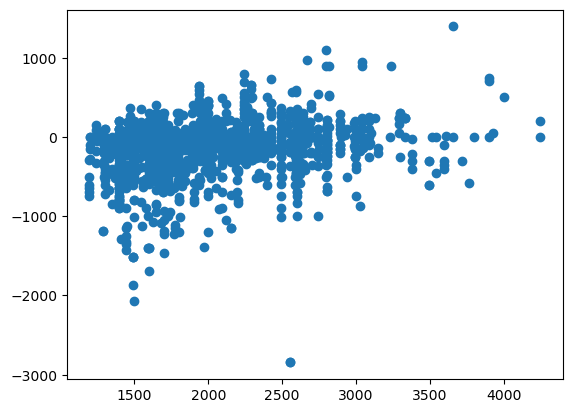

In [22]:
plt.scatter(y_pred,y_pred-y_test)